# Table of Contents

- **[1. Optimization of Active Layer Thickness](#section1)**
- **[2. Optical Modeling with a 250 nm Thick Active Layer](#section2)**
   - [2.1 Calculating Jsc at Each Wavelength Value](#section2-1)
   - [2.2 Calculating the IPCE (or EQE)](#section2-2)
- **[3. Optical Modeling of Devices with Different Active Layer Thicknesses](#section3)**
   - [3.1 Calculating EQE of Devices with Different Active Layer Thicknesses](#section3-1)
   - [3.2 Jsc at Selected Thicknesses](#section3-2)


# 1. Optimization of Active Layer Thickness 

Here, we vary the thickness of the CuGeSe/SnS layer and calculate its total contribution to the short circuit current. 
<a id="section1"></a>

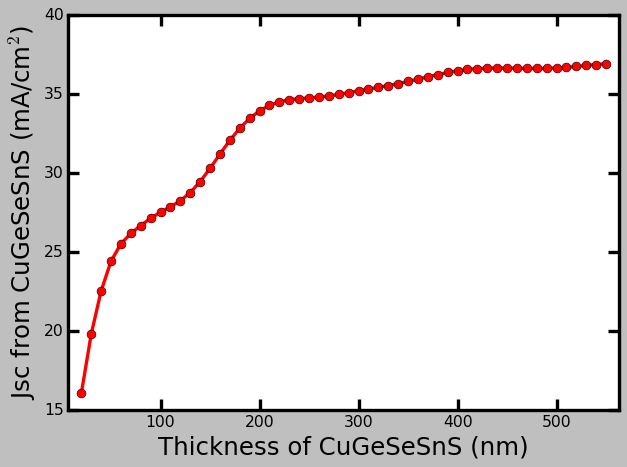

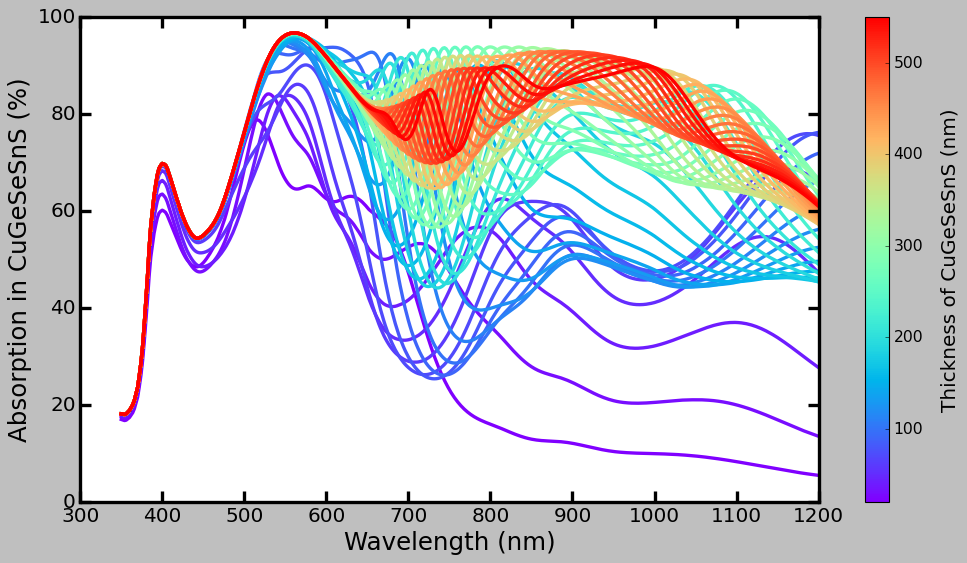

In [93]:
"""
@author: C. Marcus Chuang, 2015, Modified by C.E. Ekuma and S.M Kastuar, 2022
"""

import numpy as np
import matplotlib.pyplot as plt
from VaryThickness import OMVaryThickness
plt.style.use('classic')

# Defining the device:
Device = [
          ("Air"  ,   0), # layer 0, substrate, thickness doesn't mater
          ("ITO"    , 145), # layer 1
          ("ZnO"    ,  70), # layer 2
          ("CuGeSeSnS"     ,150), #active layer, layer 3
          ("Au"     , 150) # layer 4      
         ]


# Vary thickness of the active layer (3)
ToVary = 3  
 
#thickness range (start, end, step)    
t_range = np.arange(50, 301, 50)


# Target: Calculating the max Jsc in this layer (assuming 100% IQE)
target = 3

#Library of refractive indices of all the materials in the solar cell layers.
libname = "Index_of_Refraction_library_Demo.csv"
# Solar data file
Solarfile = "SolarAM15.csv"  # Wavelength vs  mW*cm-2*nm-1

posstep = 2.0  # thickness step size
WLrange = [350, 1500]  # wavelength range (nm)
WLstep = 2.0  # wavelength step size (nm)

#SaveName = "Result"

cbarlegend = True  # colorbar as legend for the "thickness vs Abs" plot
                   # but if there are >25 curves, colorbar will be used

interp_countour = True  # True : Contour plot (interplate data)
                        # False: Heatmap (no interp)
#########################################################################


if __name__ == "__main__":
    plt.close('all')
    #VT = OMVaryThickness(Device, libname=libname, WLrange=WLrange, plotWL=None, WLstep=WLstep, posstep=posstep, Solarfile=Solarfile)
    #VT.VaryOne(ToVary, t_range, target, toPrint=True, cbarlegend=cbarlegend)
    
    VT2 = OMVaryThickness(Device, libname="Index_of_Refraction_library_Demo.csv", WLrange=[350, 1200])
    VT2.VaryOne(3, t_range=range(20, 551, 10), target=3)
    
    plt.show()



# 2. Optical Modeling with a 250 nm thick active layer

<a id="section2"></a>

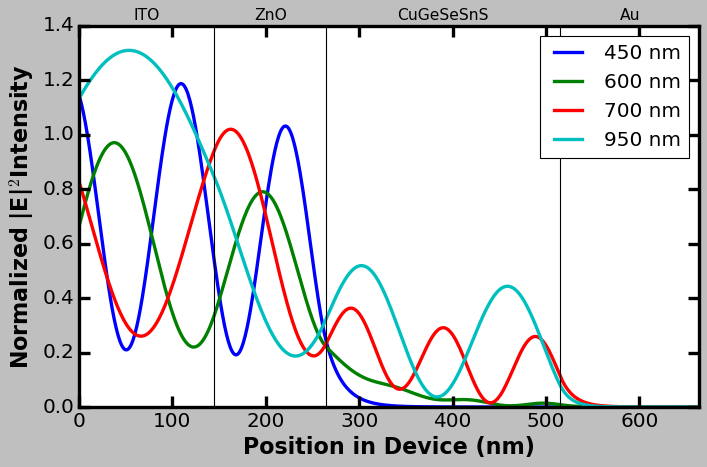

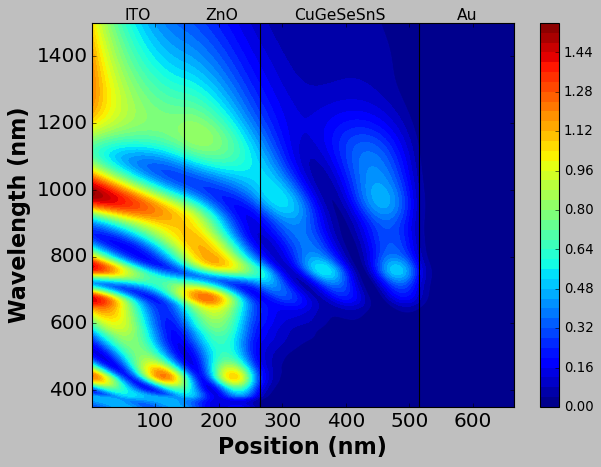

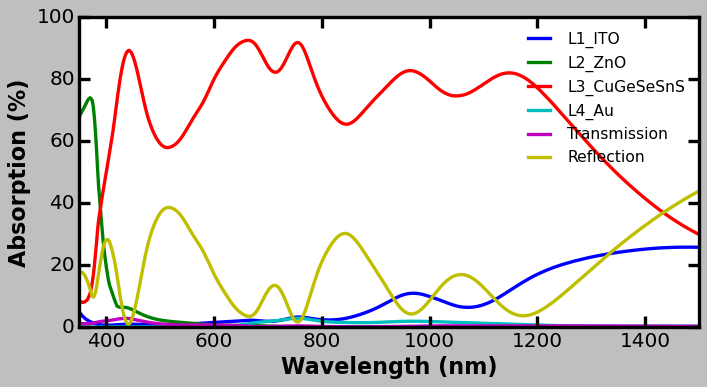

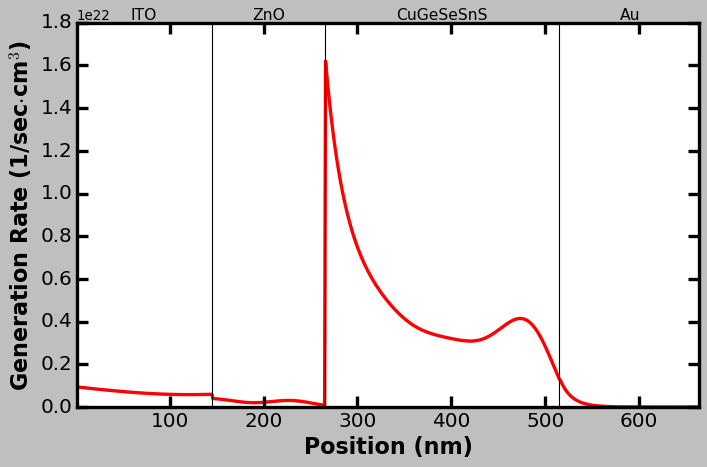

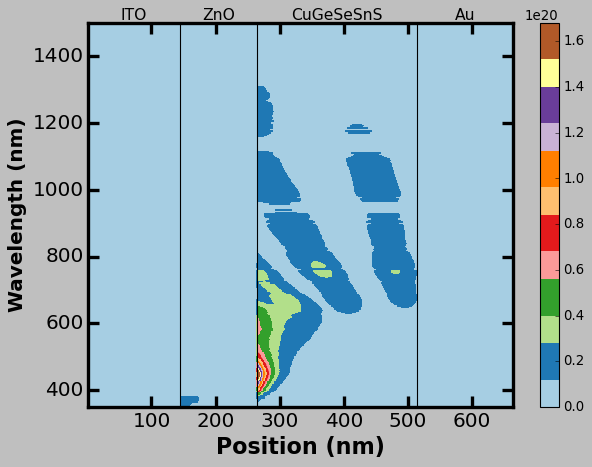


Summary of the modeled results between 350.0 and 1500.0 nm

 Layer No.  Material  Thickness (nm)  Jsc_Max (mA/cm^2)
         1       ITO             145               3.20
         2       ZnO             120               0.98
         3 CuGeSeSnS             250              38.83
         4        Au             150               0.53


In [89]:
"""
@author: C. Marcus Chuang, 2015, Modified by C.Ekuma and S.M. Kastuar, 2022
"""

from TransferMatrix import *
import matplotlib.pyplot as plt
plt.style.use('classic') 

# --------------------Mandatary user inputs-------------------------
"""
Device: (Name, thciness) ; thickness in nm
*** Names of layers of materials must match that in the library ***
For example, if the layer is called "Glass",
the library should contain a columns called "Glass_n" and "Glass_k"
where n, k are the real and imaginary part of the refraction index.
Device stack starts from the side where light is incident from.
The first layer is assumed to be a thick substrate whose thickness is
irrelivant. If a thin substrate is used, add "Air" as the first layer
indice are 0-based, i.e, the index of the first layer is 0
"""
Device = [
          ("Air"  , 100), # layer 0
          ("ITO"    , 145), # layer 1
          ("ZnO"    , 120), # layer 2
        ("CuGeSeSnS"     ,250), #active layer, layer 3
          ("Au"     , 150), #layer 4
         ]

#Library of refractive indices of all the materials in the solar cell layers.
libname = "Index_of_Refraction_library_Demo.csv"

# Solar data file
Solarfile = "SolarAM15.csv"  # Wavelength vs  mW*cm-2*nm-1

wavelength_range = [350, 1500]  # wavelength range (nm) to model [min, max]

# ------------------- End of Mandatary input -------------------------------


# Optional inputs

posstep = 1.0  # step size for thickness, must be <= the thinnest layer
WLstep = 2.0  # wavelength step size (nm)

# selected wavelengths for "E vs position plot",
# can be several values or a single value,
# if set to None or not provided, automatically select 1 or 3 values
# with gap of a multiple of 50 nm
plotWL = [450, 600, 700, 950]

plotE = True   # plot E-field vs wavelength
plotAbs = True  # plot absorption vs wavelength
plotGen = True  # plot generation rate and spectral absorption rate

SaveName = "Result"  # prefix of the file names
# whether to save the data as csv files
saveDataE, saveDataAbs, saveDataGen = True, True, True


# Save figures
# default: vector graphic 'pdf' (with non-transparent background)
# can also use 'png', 'jpg' or someother format matplotlib supports
figformat = 'pdf'
saveFigE, saveFigAbs, saveFigGen = True, True, True

# End of optional inputs


if __name__ == "__main__":

    OM = OpticalModeling(Device, libname=libname, WLrange=wavelength_range,
                         plotWL=plotWL, WLstep=WLstep, posstep=posstep)
    OM.RunSim(plotE=plotE, plotAbs=plotAbs, plotGen=plotGen,
              saveFigE=saveFigE, saveFigAbs=saveFigAbs, saveFigGen=saveFigGen,
              figformat='pdf', savename=SaveName)

    plt.grid(False)
    plt.show()

    # print total Jsc of each layer
    summary = OM.JscReport()  
    
    # save data
    OM.SaveData(savename=SaveName,
                saveE=saveDataE, saveAbs=saveDataAbs, saveGen=saveDataGen)


# 2.1 Calculating Jsc at each wavelength value

<a id="section2-1"></a>

In [8]:
# OM.Gx gives generation rate (format of data - row: position; column: wavelength)

Jsc_at_lambdas = np.sum(OM.Gx, axis = 0)*OM.WLstep*OM.posstep* q * 1e-4
print(Jsc_at_lambdas.sum())  #Should be the same as sum of Jsc_max of all the layers above
print(OM.JscData['Jsc_Max (mA/cm^2)'].sum())

43.54216833641432
43.54


In [9]:
import pandas as pd
ShortCircuitVsLambda = pd.DataFrame()
ShortCircuitVsLambda['Jsc(microA/cm2)'] = Jsc_at_lambdas*1000
# Multiplication 1000 converts Jsc from mA/cm2 to microA/cm2
#ShortCircuitVsLambda['Jsc_cumsum'] = np.cumsum(ShortCircuitVsLambda['Jsc(microA/cm2)'])
ShortCircuitVsLambda['Wavelength(nm)'] = OM.WL
ShortCircuitVsLambda

,Jsc(microA/cm2),Wavelength(nm)
0,24.268588,350.0
1,23.893290,352.0
2,28.052774,354.0
3,25.881551,356.0
4,20.299353,358.0
...,...,...
571,22.392428,1492.0
572,27.682977,1494.0
573,22.858366,1496.0
574,25.675971,1498.0


# 2.2 Calculating the IPCE (or EQE)
 IPCE(%) = 1240 $\frac{J_{sc}}{I_0\lambda}$
 
 <a id="section2-2"></a>

In [14]:
#Concentrator at the solar cell to convert 
#the spectral irradiance to intensity delivered to the cell
fconc = 1 #No concentrator 


#Import the solarfile as pandas dataframe.  
SolarData = pd.read_csv('SolarAM15.csv')

#Interpolating solar data to wavelength range of the Jsc values
ShortCircuitVsLambda['Irr(W*m-2*mn-1)'] = np.interp(ShortCircuitVsLambda['Wavelength(nm)'],SolarData['Wavelength (nm)'],(SolarData['Global tilt  mW*cm-2*nm-1 (1sun AM 1.5)']*10))

#Calculating IPCE
ShortCircuitVsLambda['IPCE(%)'] = 1240*ShortCircuitVsLambda['Jsc(microA/cm2)']/(ShortCircuitVsLambda['Irr(W*m-2*mn-1)']*fconc*ShortCircuitVsLambda['Wavelength(nm)'])
ShortCircuitVsLambda

,Jsc(microA/cm2),Wavelength(nm),Irr(W*m-2*mn-1),IPCE(%)
0,24.268588,350.0,0.52798,162.847345
1,23.893290,352.0,0.51791,162.517706
2,28.052774,354.0,0.60498,162.425130
3,25.881551,356.0,0.55387,162.762421
4,20.299353,358.0,0.43006,163.490228
...,...,...,...,...
571,22.392428,1492.0,0.16441,113.194629
572,27.682977,1494.0,0.20367,112.812395
573,22.858366,1496.0,0.16852,112.430418
574,25.675971,1498.0,0.18968,112.050864


Text(0, 0.5, 'EQE (%)')

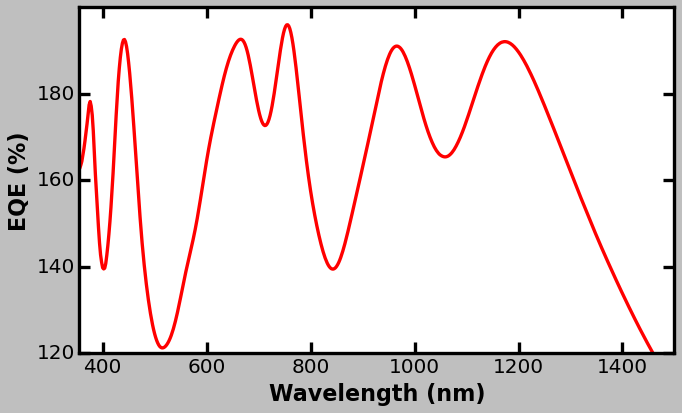

In [18]:
f, ax = plt.subplots(figsize=(9.6, 5.4))
ax.plot(ShortCircuitVsLambda['Wavelength(nm)'], ShortCircuitVsLambda['IPCE(%)'], color = 'r', linewidth=3)
ax.set_xlim([355, 1500])
ax.set_ylim([120, 200])
ax.tick_params(labelsize=18, length = 10, width = 3)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 20))


plt.xlabel('Wavelength (nm)', size=20, fontweight='bold')
plt.ylabel('EQE (%)', size=20, fontweight='bold')

#f.savefig('EQE_max_thickness.pdf', transparent=False, dpi = 300, bbox_inches = "tight")


# 3. Optical Modeling of Devices with Different Active Layer Thicknesses

<a id="section3"></a>

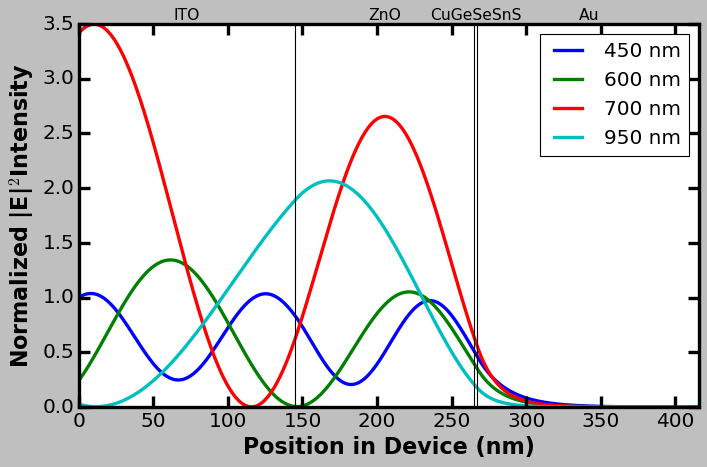

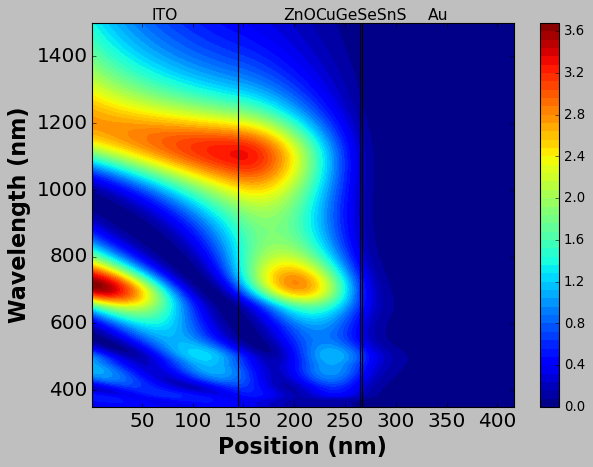

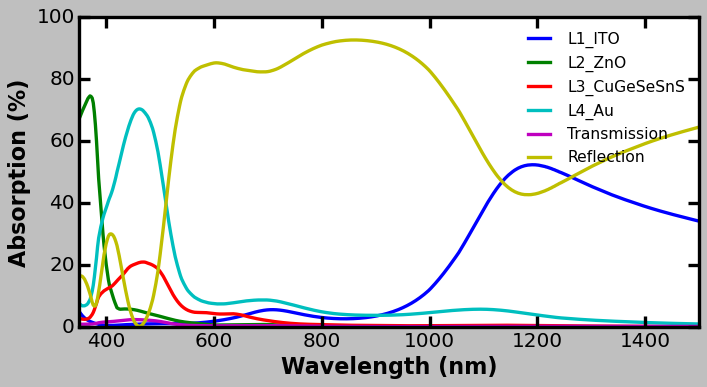

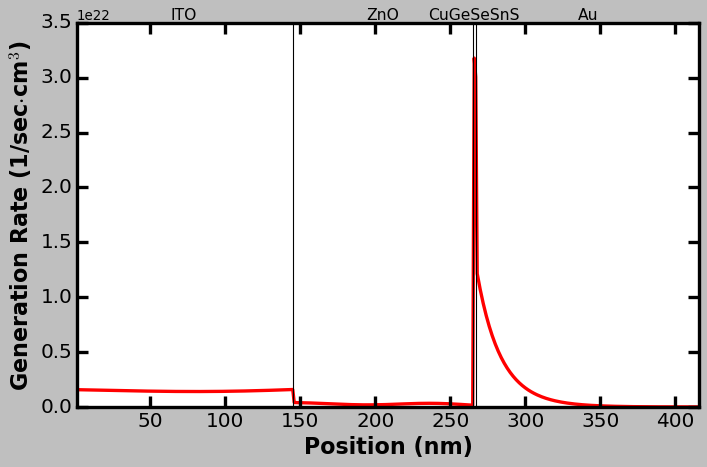

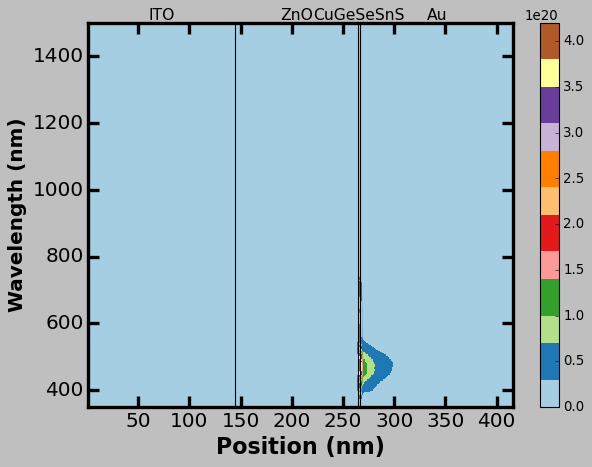


Summary of the modeled results between 350.0 and 1500.0 nm

 Layer No.  Material  Thickness (nm)  Jsc_Max (mA/cm^2)
         1       ITO             145               6.85
         2       ZnO             120               1.07
         3 CuGeSeSnS               2               1.98
         4        Au             150               6.61


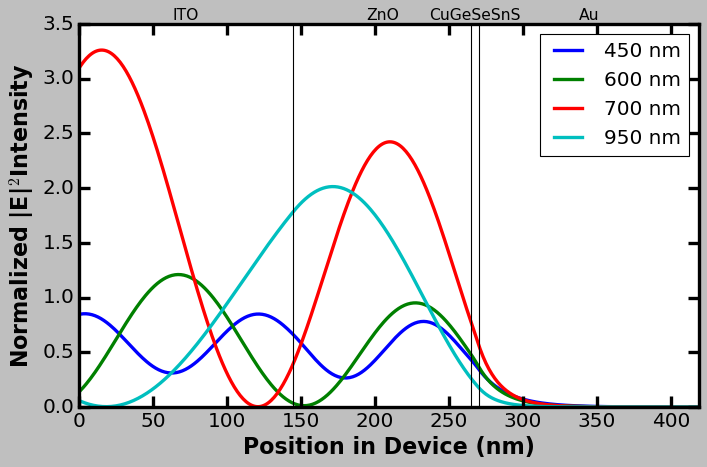

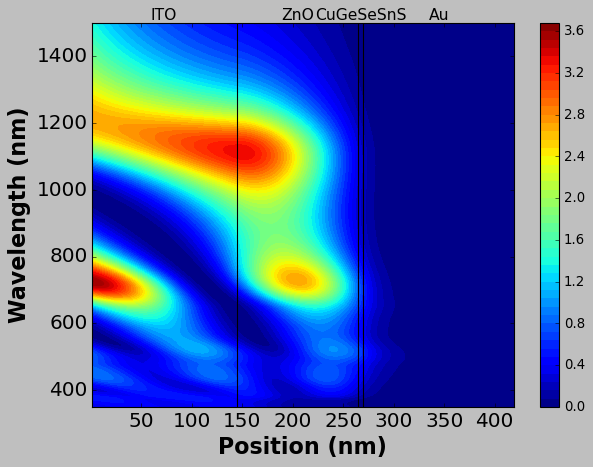

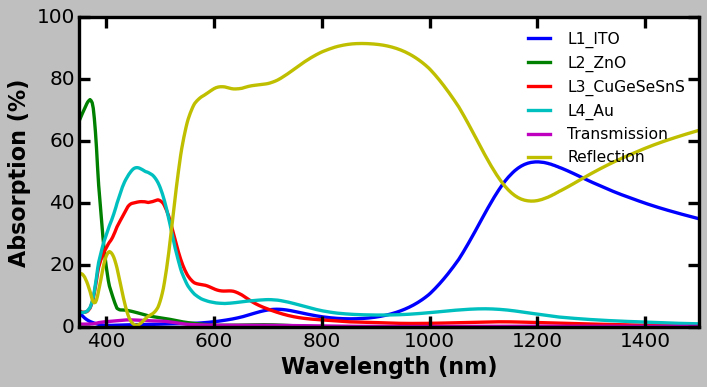

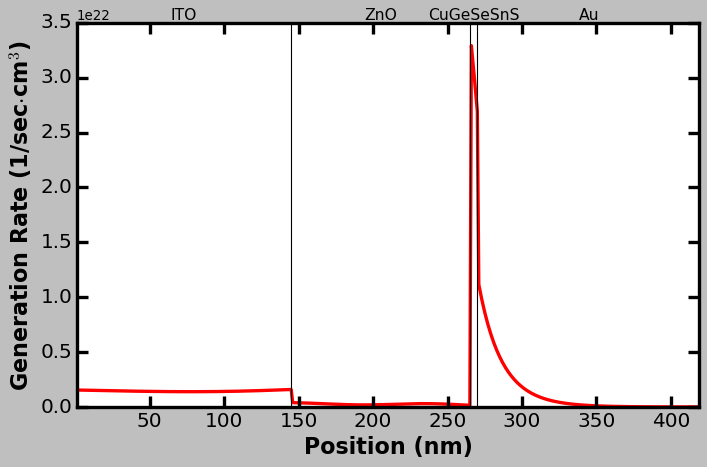

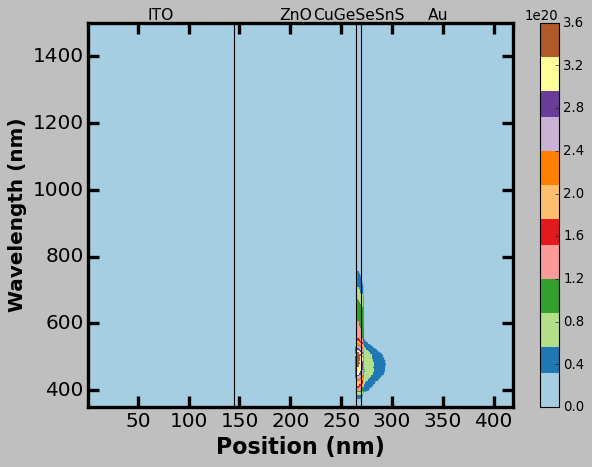


Summary of the modeled results between 350.0 and 1500.0 nm

 Layer No.  Material  Thickness (nm)  Jsc_Max (mA/cm^2)
         1       ITO             145               6.77
         2       ZnO             120               1.01
         3 CuGeSeSnS               5               4.80
         4        Au             150               5.94


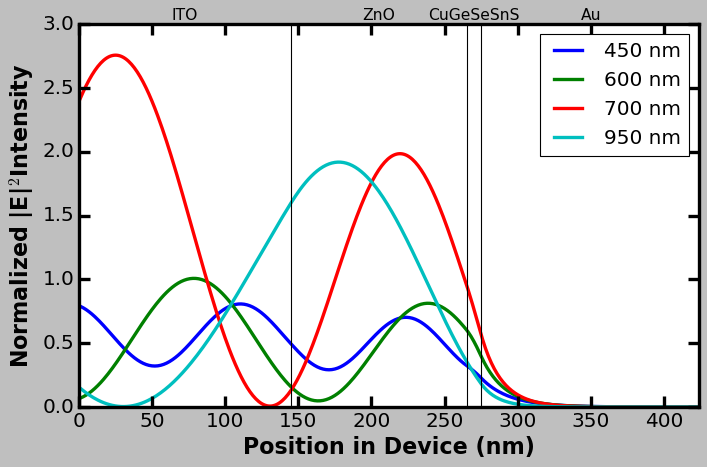

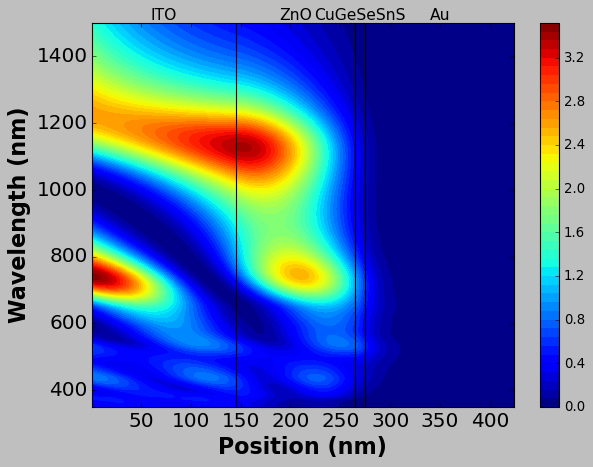

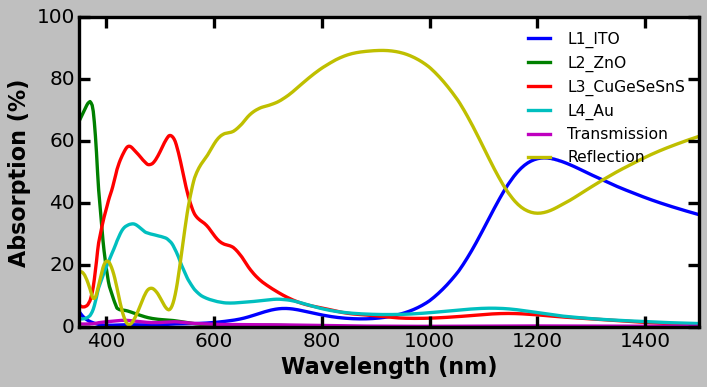

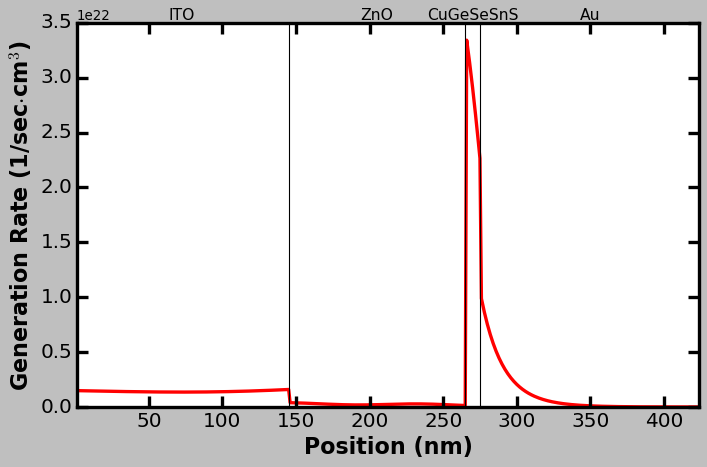

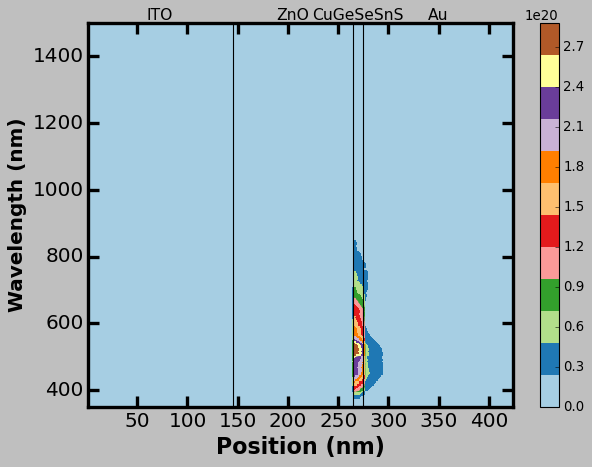


Summary of the modeled results between 350.0 and 1500.0 nm

 Layer No.  Material  Thickness (nm)  Jsc_Max (mA/cm^2)
         1       ITO             145               6.62
         2       ZnO             120               0.96
         3 CuGeSeSnS              10               9.07
         4        Au             150               5.06


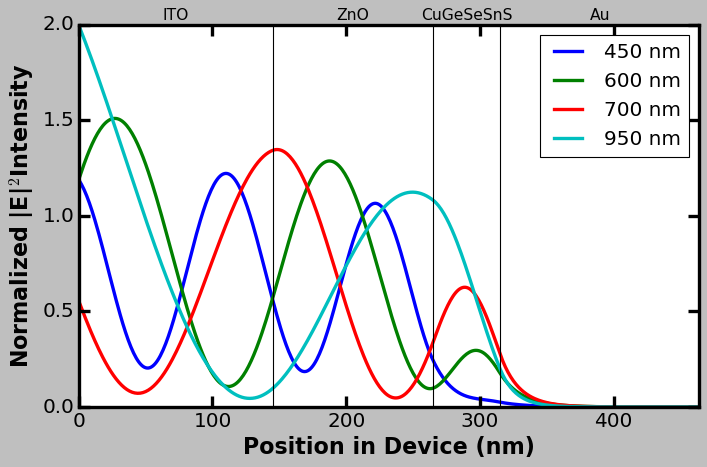

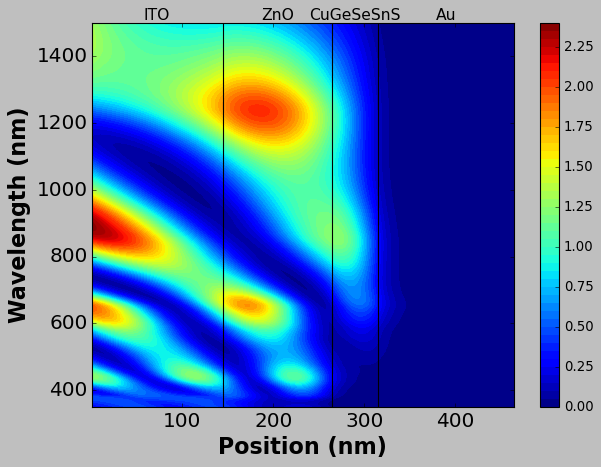

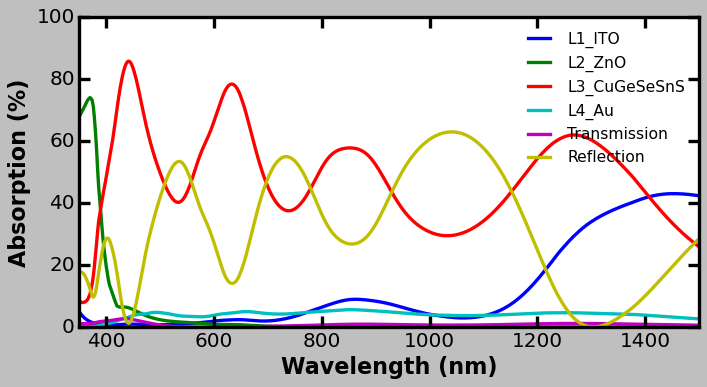

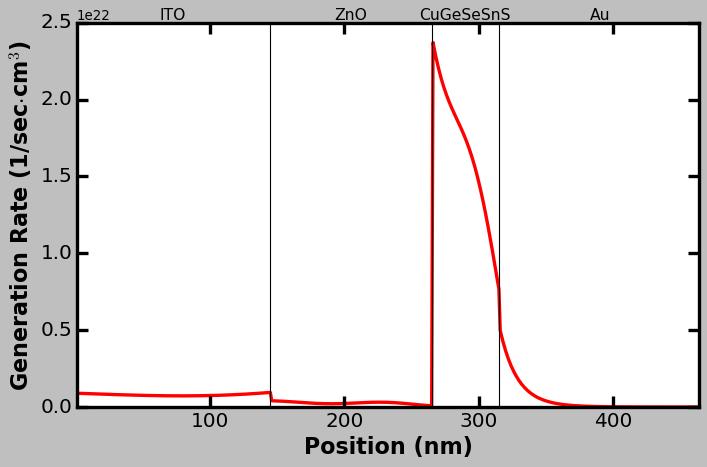

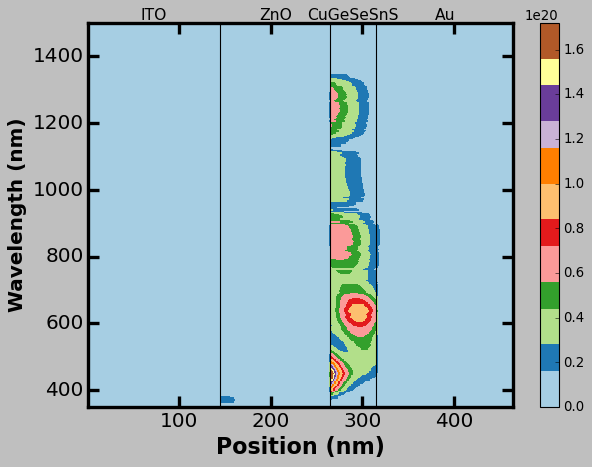


Summary of the modeled results between 350.0 and 1500.0 nm

 Layer No.  Material  Thickness (nm)  Jsc_Max (mA/cm^2)
         1       ITO             145               3.69
         2       ZnO             120               1.00
         3 CuGeSeSnS              50              26.61
         4        Au             150               2.21


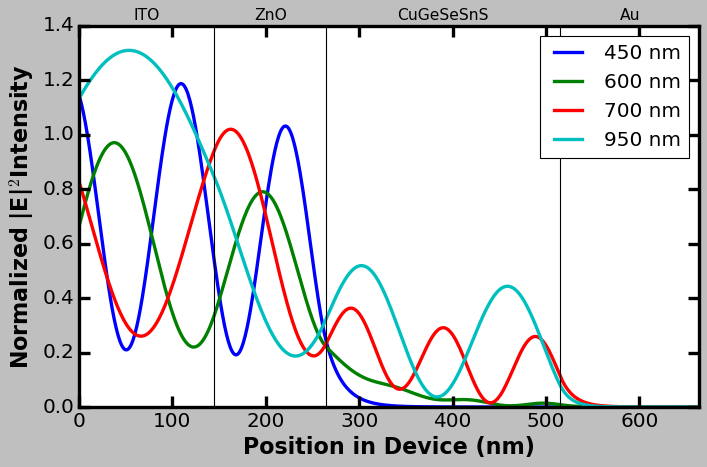

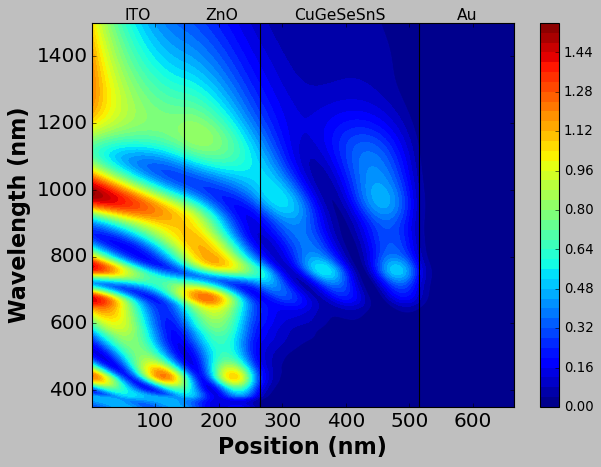

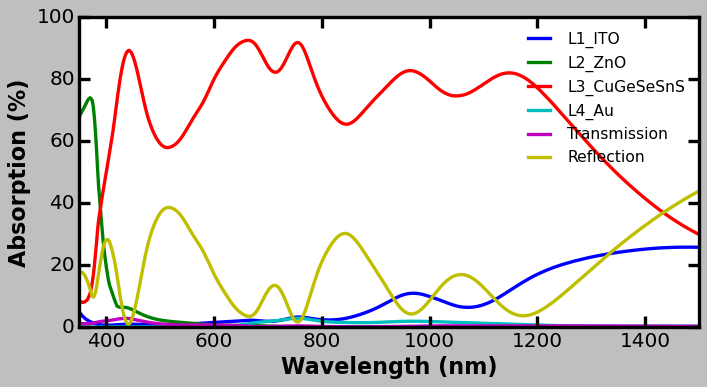

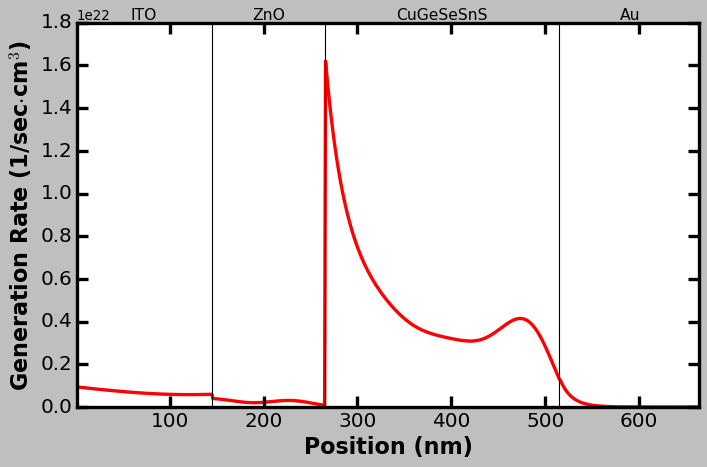

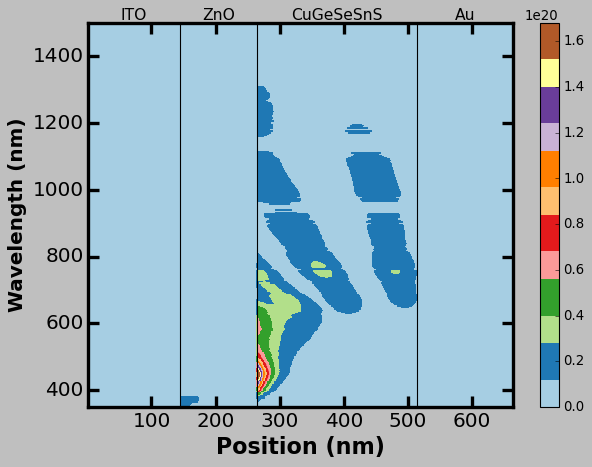


Summary of the modeled results between 350.0 and 1500.0 nm

 Layer No.  Material  Thickness (nm)  Jsc_Max (mA/cm^2)
         1       ITO             145               3.20
         2       ZnO             120               0.98
         3 CuGeSeSnS             250              38.83
         4        Au             150               0.53


In [94]:
from TransferMatrix import * #OpticalModeling
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('classic') 


Device2 = [
          ("Air"  , 100), 
          ("ITO"    , 145), 
          ("ZnO"    , 120),
        ("CuGeSeSnS"     ,2),
          ("Au"     , 150)
         ]

Device5 = [
          ("Air"  , 100),
          ("ITO"    , 145), 
          ("ZnO"    , 120),
        ("CuGeSeSnS"     ,5),
          ("Au"     , 150)
         ]

Device10 = [
          ("Air"  , 100), 
          ("ITO"    , 145), 
          ("ZnO"    , 120),
        ("CuGeSeSnS"     ,10),
          ("Au"     , 150)
         ]

Device50 = [
          ("Air"  , 100), 
          ("ITO"    , 145),
          ("ZnO"    , 120),
        ("CuGeSeSnS"     ,50),
          ("Au"     , 150)
         ]

Device250 = [
          ("Air"  , 100), 
          ("ITO"    , 145), 
          ("ZnO"    , 120),
        ("CuGeSeSnS"     ,250),
          ("Au"     , 150)
         ]


libname = "Index_of_Refraction_library_Demo.csv"

Solarfile = "SolarAM15.csv"  # Wavelength vs  mW*cm-2*nm-1

wavelength_range = [350, 1500]  # wavelength range (nm) to model [min, max]

# ------------------- End of Mandatary input -------------------------------


posstep = 1.0  # step size for thickness, must be <= the thinnest layer
WLstep = 2.0  # wavelength step size (nm)

plotWL = [450, 600, 700, 950]

plotE = True   # plot E-field vs wavelength
plotAbs = True  # plot absorption vs wavelength
plotGen = True  # plot generation rate and spectral absorption rate

# prefix of the file names
SaveName_2 = "2nm"
SaveName_5 = "5nm"
SaveName_10 = "10nm"
SaveName_50 = "50nm"
SaveName_250 = "250nm"

# whether to save the data as csv files
saveDataE, saveDataAbs, saveDataGen = False, False, False
# wherther to save the figures
# default format is vector graphic 'pdf' (with non-transparent background)
# can also use 'png', 'jpg' or someother format matplotlib supports
figformat = 'pdf'
saveFigE, saveFigAbs, saveFigGen = True, True, True

# ------------------- End of optional input -------------------------------


if __name__ == "__main__":

    # ### --------------- run with Mandatary input only --------
    # initialize an OpticalModeling obj OM
    # OM = OpticalModeling(Device, libname=libname, WLrange=wavelength_range)
    # do all the caculation
    # OM.RunSim()
    # ## ---------------------------------------------------------------------


    # ### --------------- run with all the user input  --------
    # initialize an OpticalModeling obj OM
    OM2 = OpticalModeling(Device2, libname=libname, WLrange=wavelength_range,
                         plotWL=plotWL, WLstep=WLstep, posstep=posstep)
    OM2.RunSim(plotE=plotE, plotAbs=plotAbs, plotGen=plotGen,
              saveFigE=saveFigE, saveFigAbs=saveFigAbs, saveFigGen=saveFigGen,
              figformat='pdf', savename=SaveName_2)
    
    plt.grid(False)
    plt.show()

    summary = OM2.JscReport()  
    
    OM2.SaveData(savename=SaveName_2,
                saveE=saveDataE, saveAbs=saveDataAbs, saveGen=saveDataGen)
    ####----------------------------------------------------------------------
    
    OM5 = OpticalModeling(Device5, libname=libname, WLrange=wavelength_range,
                         plotWL=plotWL, WLstep=WLstep, posstep=posstep)
    OM5.RunSim(plotE=plotE, plotAbs=plotAbs, plotGen=plotGen,
              saveFigE=saveFigE, saveFigAbs=saveFigAbs, saveFigGen=saveFigGen,
              figformat='pdf', savename=SaveName_5)
    
    plt.grid(False)
    plt.show()

    summary = OM5.JscReport() 
    OM5.SaveData(savename=SaveName_5,
                saveE=saveDataE, saveAbs=saveDataAbs, saveGen=saveDataGen)
    ####----------------------------------------------------------------------
        
    OM10 = OpticalModeling(Device10, libname=libname, WLrange=wavelength_range,
                         plotWL=plotWL, WLstep=WLstep, posstep=posstep)
    OM10.RunSim(plotE=plotE, plotAbs=plotAbs, plotGen=plotGen,
              saveFigE=saveFigE, saveFigAbs=saveFigAbs, saveFigGen=saveFigGen,
              figformat='pdf', savename=SaveName_10)
    
    plt.grid(False)
    plt.show()

    summary = OM10.JscReport() 
    OM10.SaveData(savename=SaveName_10,
                saveE=saveDataE, saveAbs=saveDataAbs, saveGen=saveDataGen)
    
    ####----------------------------------------------------------------------  
    
    OM50 = OpticalModeling(Device50, libname=libname, WLrange=wavelength_range,
                         plotWL=plotWL, WLstep=WLstep, posstep=posstep)
    OM50.RunSim(plotE=plotE, plotAbs=plotAbs, plotGen=plotGen,
              saveFigE=saveFigE, saveFigAbs=saveFigAbs, saveFigGen=saveFigGen,
              figformat='pdf', savename=SaveName_50)
    
    plt.grid(False)
    plt.show()

    summary = OM50.JscReport() 
    OM50.SaveData(savename=SaveName_50,
                saveE=saveDataE, saveAbs=saveDataAbs, saveGen=saveDataGen)
    
    ####----------------------------------------------------------------------

    OM250 = OpticalModeling(Device250, libname=libname, WLrange=wavelength_range,
                         plotWL=plotWL, WLstep=WLstep, posstep=posstep)
    OM250.RunSim(plotE=plotE, plotAbs=plotAbs, plotGen=plotGen,
              saveFigE=saveFigE, saveFigAbs=saveFigAbs, saveFigGen=saveFigGen,
              figformat='pdf', savename=SaveName_250)
    
    plt.grid(False)
    plt.show()

    summary = OM250.JscReport()  
    OM250.SaveData(savename=SaveName_250,
                saveE=saveDataE, saveAbs=saveDataAbs, saveGen=saveDataGen)
    
    # ###----------------------------------------------------------------------
    

## 3.1 Calculating EQE of Devices with Different Active Layer Thicknesses
<a id="section3-1"></a>


In [95]:
## First we print the Jsc data for each device.

#Modeled devices: 
objects_dict = {
    "OM2": OM2,
    "OM5": OM5,
    "OM10": OM10,
    "OM50": OM50,
    "OM250": OM250,
}

for obj_name, obj in objects_dict.items():
    print(f"{obj_name}.JscData: {obj.JscData}")
   

OM2.JscData:    Layer No.   Material  Thickness (nm)  Jsc_Max (mA/cm^2)
0          1        ITO             145               6.85
1          2        ZnO             120               1.07
2          3  CuGeSeSnS               2               1.98
3          4         Au             150               6.61
OM5.JscData:    Layer No.   Material  Thickness (nm)  Jsc_Max (mA/cm^2)
0          1        ITO             145               6.77
1          2        ZnO             120               1.01
2          3  CuGeSeSnS               5               4.80
3          4         Au             150               5.94
OM10.JscData:    Layer No.   Material  Thickness (nm)  Jsc_Max (mA/cm^2)
0          1        ITO             145               6.62
1          2        ZnO             120               0.96
2          3  CuGeSeSnS              10               9.07
3          4         Au             150               5.06
OM50.JscData:    Layer No.   Material  Thickness (nm)  Jsc_Max (mA/cm^2)
0 

In [96]:
## Next, we calculate the total Jsc of each device by summing the Jsc at different wavelengths
## and also by summing the total Jsc per layer. Both should be the same. 

# Initalise a pandas dataframe
Jsc_v_lambda = pd.DataFrame()

for obj_name, obj in objects_dict.items():
    Jsc_at_lambdas = np.sum(obj.Gx, axis=0) * obj.WLstep * obj.posstep * q * 1e-4
    print("Device - ", obj_name)
    print("Sum of Jsc at each lambda", Jsc_at_lambdas.sum())
    print("Sum of Jsc from each layer", obj.JscData['Jsc_Max (mA/cm^2)'].sum())
    Jsc_v_lambda[f'Jsc_{obj_name[2:]}'] = Jsc_at_lambdas * 1000  # Use the correct column name

Jsc_v_lambda['Lambda_nm'] = OM2.WL
Jsc_v_lambda    

Device -  OM2
Sum of Jsc at each lambda 16.516667459821342
Sum of Jsc from each layer 16.51
Device -  OM5
Sum of Jsc at each lambda 18.52525690969896
Sum of Jsc from each layer 18.52
Device -  OM10
Sum of Jsc at each lambda 21.703105555920217
Sum of Jsc from each layer 21.709999999999997
Device -  OM50
Sum of Jsc at each lambda 33.515936765829466
Sum of Jsc from each layer 33.51
Device -  OM250
Sum of Jsc at each lambda 43.54216833641432
Sum of Jsc from each layer 43.54


,Jsc_2,Jsc_5,Jsc_10,Jsc_50,Jsc_250,Lambda_nm
0,24.672449,24.439213,24.254677,24.271511,24.268588,350.0
1,24.300961,24.073984,23.888674,23.896391,23.893290,352.0
2,28.538751,28.277497,28.057634,28.056658,28.052774,354.0
3,26.339133,26.101133,25.894923,25.885413,25.881551,356.0
4,20.667603,20.482021,20.316650,20.302643,20.299353,358.0
...,...,...,...,...,...,...
571,14.096534,14.512186,15.296824,28.569180,22.392428,1492.0
572,17.439988,17.951960,18.918099,35.272325,27.682977,1494.0
573,14.411280,14.832479,15.627054,29.086300,22.858366,1496.0
574,16.199713,16.671112,17.560088,32.628000,25.675971,1498.0


In [97]:
#Concentrator at the solar cell to convert 
#the spectral irradiance to intensity delivered to the cell
fconc = 1  #No concentrator


#SolarData
SolarData = pd.read_csv('SolarAM15.csv')

#Interpolating solar data to wavelength range of the Jsc values
Jsc_v_lambda['Irr(W*m-2*mn-1)'] = np.interp(Jsc_v_lambda['Lambda_nm'],SolarData['Wavelength (nm)'],(SolarData['Global tilt  mW*cm-2*nm-1 (1sun AM 1.5)']*10))

#Calculating IPCE

Jsc_v_lambda['EQE2'] = 1240*Jsc_v_lambda['Jsc_2']/(Jsc_v_lambda['Irr(W*m-2*mn-1)']*fconc*Jsc_v_lambda['Lambda_nm'])
Jsc_v_lambda['EQE5'] = 1240*Jsc_v_lambda['Jsc_5']/(Jsc_v_lambda['Irr(W*m-2*mn-1)']*fconc*Jsc_v_lambda['Lambda_nm'])
Jsc_v_lambda['EQE10'] = 1240*Jsc_v_lambda['Jsc_10']/(Jsc_v_lambda['Irr(W*m-2*mn-1)']*fconc*Jsc_v_lambda['Lambda_nm'])
Jsc_v_lambda['EQE50'] = 1240*Jsc_v_lambda['Jsc_50']/(Jsc_v_lambda['Irr(W*m-2*mn-1)']*fconc*Jsc_v_lambda['Lambda_nm'])
Jsc_v_lambda['EQE250'] = 1240*Jsc_v_lambda['Jsc_250']/(Jsc_v_lambda['Irr(W*m-2*mn-1)']*fconc*Jsc_v_lambda['Lambda_nm'])

Jsc_v_lambda

,Jsc_2,Jsc_5,Jsc_10,Jsc_50,Jsc_250,Lambda_nm,Irr(W*m-2*mn-1),EQE2,EQE5,EQE10,EQE50,EQE250
0,24.672449,24.439213,24.254677,24.271511,24.268588,350.0,0.52798,165.557337,163.992272,162.753997,162.866960,162.847345
1,24.300961,24.073984,23.888674,23.896391,23.893290,352.0,0.51791,165.290604,163.746754,162.486306,162.538797,162.517706
2,28.538751,28.277497,28.057634,28.056658,28.052774,354.0,0.60498,165.238925,163.726269,162.453270,162.447615,162.425130
3,26.339133,26.101133,25.894923,25.885413,25.881551,356.0,0.55387,165.640035,164.143319,162.846515,162.786707,162.762421
4,20.667603,20.482021,20.316650,20.302643,20.299353,358.0,0.43006,166.456102,164.961429,163.629540,163.516726,163.490228
...,...,...,...,...,...,...,...,...,...,...,...,...
571,14.096534,14.512186,15.296824,28.569180,22.392428,1492.0,0.16441,71.258547,73.359685,77.326066,144.418360,113.194629
572,17.439988,17.951960,18.918099,35.272325,27.682977,1494.0,0.20367,71.070635,73.157002,77.094168,143.740154,112.812395
573,14.411280,14.832479,15.627054,29.086300,22.858366,1496.0,0.16852,70.882852,72.954552,76.862721,143.062931,112.430418
574,16.199713,16.671112,17.560088,32.628000,25.675971,1498.0,0.18968,70.696131,72.753334,76.632856,142.389771,112.050864


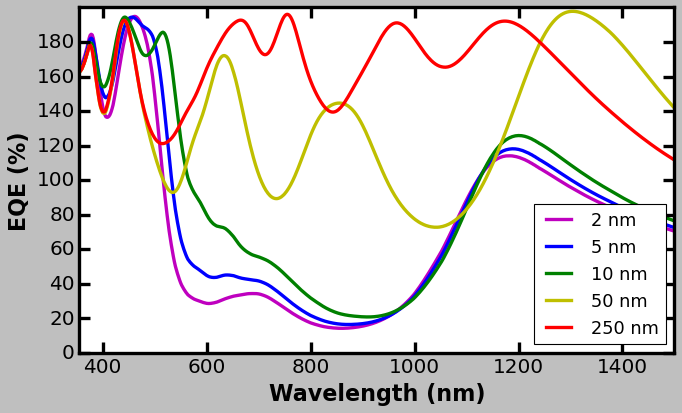

In [98]:
## Plot all EQEs. 

f, ax = plt.subplots(figsize=(9.6, 5.4))
ax.plot(Jsc_v_lambda['Lambda_nm'], Jsc_v_lambda['EQE2'], color = 'm', linewidth=3, label='2 nm')
ax.plot(Jsc_v_lambda['Lambda_nm'], Jsc_v_lambda['EQE5'], color = 'b', linewidth=3, label='5 nm')
ax.plot(Jsc_v_lambda['Lambda_nm'], Jsc_v_lambda['EQE10'], color = 'g', linewidth=3, label='10 nm')
ax.plot(Jsc_v_lambda['Lambda_nm'], Jsc_v_lambda['EQE50'], color = 'y', linewidth=3, label='50 nm')
ax.plot(Jsc_v_lambda['Lambda_nm'], Jsc_v_lambda['EQE250'], color = 'r', linewidth=3, label='250 nm')

ax.set_xlim([355, 1500])
ax.set_ylim([0, 200])
ax.tick_params(labelsize=18, length = 10, width = 3)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 20))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.xlabel('Wavelength (nm)', size=20, fontweight='bold')
plt.ylabel('EQE (%)', size=20, fontweight='bold')

# Adding legend
ax.legend(fontsize=16, loc = 'lower right')

#f.savefig('EQE_all_thickness.pdf', transparent=False, dpi = 300, bbox_inches = "tight")






## 3.2 Jsc at Selected Thicknesses

We used this to plot the Jsc of the device with 2 nm thick active layer. Can be used for other plots by changing "selected_device" variable. 

<a id="section3-2"></a>


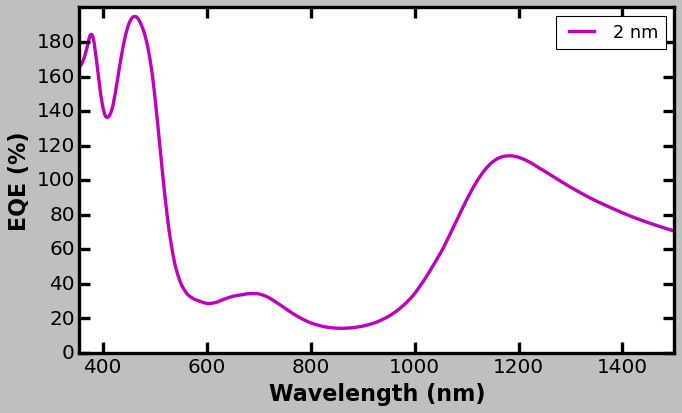

In [99]:
# Select the device : 2, 5, 10, 50 or 250
selected_device = "2"

# Extract the corresponding column name
eqe_column = f'EQE{selected_device}'

f, ax = plt.subplots(figsize=(9.6, 5.4))
ax.plot(Jsc_v_lambda['Lambda_nm'], Jsc_v_lambda[eqe_column], color='m', linewidth=3, label=f'{selected_device} nm')

ax.set_xlim([355, 1500])
ax.set_ylim([0, 200])
ax.tick_params(labelsize=18, length=10, width=3)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(3)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 20))

plt.xlabel('Wavelength (nm)', size=20, fontweight='bold')
plt.ylabel('EQE (%)', size=20, fontweight='bold')

# Adding legend
ax.legend(fontsize=16, loc='upper right')

## Save plots: Uncomment the two lines below to save the plot to file:
#output_filename = f'EQE_{selected_device}nm.pdf'
#f.savefig(output_filename, transparent=False, dpi=300, bbox_inches="tight")


plt.show()